In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv("dataset/housing.csv")

# Analyse exploratoire rapide
# Affichage des premières lignes du jeu de données
print(data.head())



      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [6]:
# Infos sur le jeu de données (types, valeurs manquantes, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None


In [72]:
# Statistiques descriptives
print(data.describe())


               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


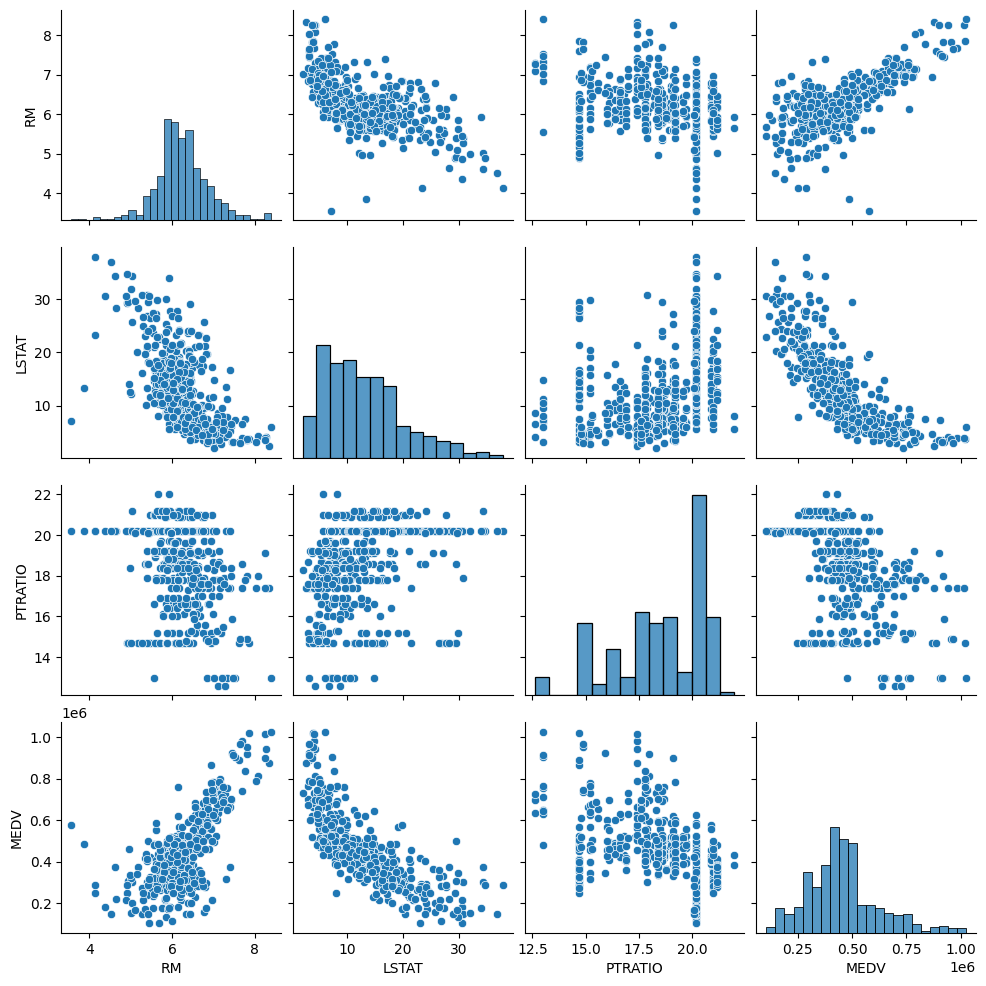

In [3]:
#comparaison des données chaque donnée sur une autre

sns.pairplot(data)

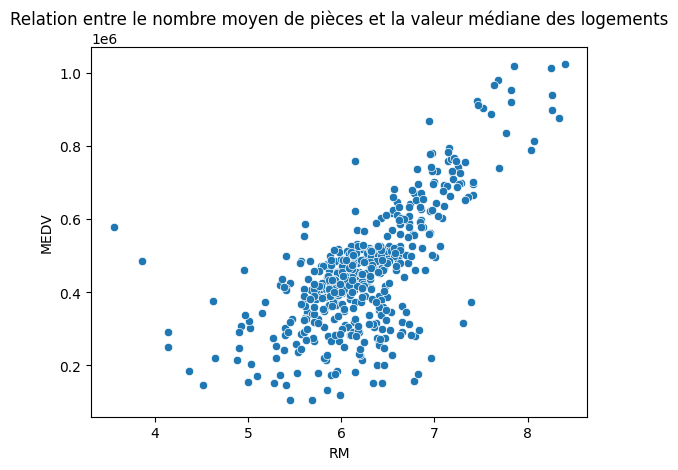

In [73]:
# Visualisation des tendances
# Exemple : Relation entre la superficie et le prix
sns.scatterplot(x="RM", y="MEDV", data=data)
plt.title('Relation entre le nombre moyen de pièces et la valeur médiane des logements')
plt.show()


In [74]:
#Modele de regression lineaire

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
# Choix des caractéristiques pertinentes

# Supposons que la colonne temporelle est appelée 'LSTAT' et que vous souhaitez prédire 'MEDV'
#X = data[['RM', 'LSTAT', 'PTRATIO']]  # Caractéristiques

X = data[['RM','LSTAT']]
y = data['MEDV']  # Variable cible


In [76]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
#affichage des donnee de Test

print(X_test)

        RM
451  5.926
84   6.389
434  6.655
472  5.414
428  6.459
..     ...
317  5.868
376  6.193
56   6.383
275  6.230
398  6.434

[98 rows x 1 columns]


In [78]:
#coefficient et optimisation et intercep et ordonnee a l'origine


print(model.intercept_)
print(model.coef_)

-642884.4934184267
[176526.28588093]


In [79]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 13362423686.169027
R-squared: 0.39199803735016137


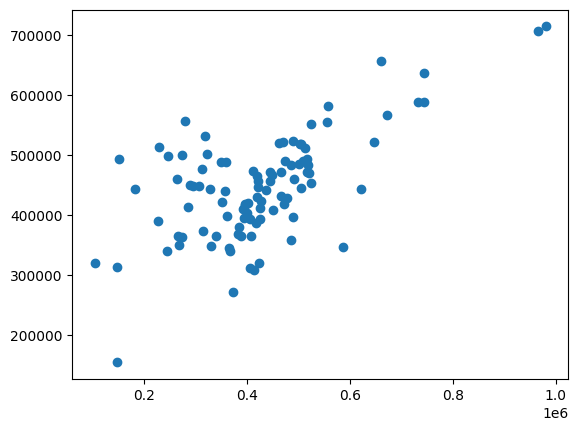

In [60]:
#comparaison des des y_test et y_predict

plt.scatter(y_test,y_pred)

In [35]:
# Enregistrez le modèle avec pickle
import pickle

with open('modele_regression_lineaire.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
